In [1]:
# Data Pre-processing
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'./Reviews.csv')
# df.head

In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [4]:
df['Helpfull%'] = np.where(df['HelpfulnessDenominator']>0,df['HelpfulnessNumerator']/df['HelpfulnessDenominator'],-1)

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfull%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [7]:
df['%upvote'] = pd.cut(df['Helpfull%'],bins=[-1,0,0.2,0.4,0.6,0.8,1],labels=['Empty','0-20%','20-40%','40-60%','60-80%','80-100%'])

In [9]:
df.groupby(['Score','%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpfull%  
Score %upvote                                                              
1     Empty                      8060    8060     8060    8060       8060  
      0-20%                      2338    2338     2338    2338       2338  
      20-40%                     4649    4649     4649    4649       4649  
      40-60%                     6586    6586     6586    6586       6586  
      60-80%                     5838    5838     5838    5838       5838  
      80-100%                   12531   12531    12531   12531      12531  
2     Empty                      4234    4234     4234    4234       4234  
      0-20%                       762     762      737     762        762  
      20-40%                     1618    1618     1618    1618       1618  
      40-60%                     3051    3051     3051    3051       3051  
      60-80%                     2486    2486     2486    2486       2486  
      80-100%                    7014    7014     7014    7014       7014  
3     Empty                      5062    5062     5062    5062       5062  
      0-20%                       474     474      474     474        474  
      20-40%                     1506    1506     1506    1506       1506  
      40-60%                     3384    3384     3384    3384       3384  
      60-80%                     2754    2754     2754    2754       2754  
      80-100%                   11037   11037 

In [11]:
df_s = df.groupby(['Score','%upvote']).agg({'Id':'count'}).reset_index()

In [14]:
pivot = df_s.pivot(index='%upvote',columns = 'Score')

In [15]:
import seaborn as sns

<AxesSubplot:xlabel='None-Score', ylabel='%upvote'>

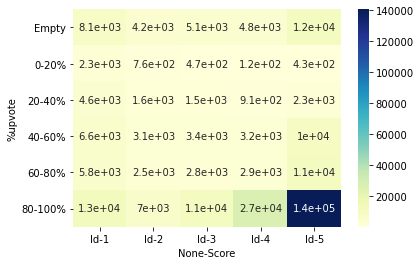

In [86]:
sns.heatmap(pivot, annot = True,cmap='YlGnBu')

In [ ]:
# Apply bag of Words on data

In [20]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [21]:
df2 = df[df['Score']!=3]

In [22]:
X = df2['Text']

In [23]:
df2['Score'].unique()

array([5, 1, 4, 2])

In [24]:
y_dict = {1:0,2:0,4:1,5:1}
y = df2['Score'].map(y_dict)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
c= CountVectorizer(stop_words='english')

In [28]:
X_c =c.fit_transform(X)

In [29]:
X_c.shape

(525814, 114969)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_c,y)

In [32]:
X_train.shape

(394360, 114969)

In [33]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [34]:
ml = log.fit(X_train,y_train)

/home/tommy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
ml.score(X_test,y_test)

0.9373621190682673

In [38]:
w = c.get_feature_names()

In [39]:
coef = ml.coef_.tolist()[0]

In [41]:
coef_df = pd.DataFrame({'Word':w,'Coefficient':coef})
coef_df

,Word,Coefficient
0,00,-0.338407
1,000,-0.001190
2,0000,0.463175
3,000001,-0.002407
4,00001,0.001672
...,...,...
114964,çaykur,0.000682
114965,çelem,-0.130258
114966,être,0.024361
114967,île,0.000000


In [42]:
coef_df.sort_values(['Coefficient','Word'],ascending=False)

,Word,Coefficient
80600,pleasantly,4.614689
39072,downside,3.101279
5865,addicting,3.059517
94667,skeptical,2.916767
96353,soothing,2.594551
...,...,...
113164,worst,-3.312795
106852,unacceptable,-3.467993
88945,ripoff,-3.564066
34989,deceptive,-3.661720


In [44]:
top20 = coef_df.sort_values(['Coefficient','Word'],ascending=False).head(20)

In [45]:
bot20 = coef_df.sort_values(['Coefficient','Word'],ascending=True).head(20)

In [ ]:
# Automate NLP model and ML model

In [58]:
def text_fit(X,y,nlp_model,ml_model,coef_show =1):
    X_c = nlp_model.fit_transform(X)
    print('features:{}'.format(X_c.shape[1]))
    X_train,X_test,y_train,y_test= train_test_split(X_c,y)
    ml=ml_model.fit(X_train,y_train)
    acc = ml.score(X_test,y_test)
    print(acc)
    
    if coef_show==1:
        w=c.get_feature_names()
        coef =ml.coef_.tolist()[0]
        coef_df = pd.DataFrame({'Word':w,'Coefficient':coef})
        coef_df = coef_df.sort_values(['Coefficient','Word'],ascending=False)
        print('Top 20 Positive words')
        print(coef_df.head(20))
        print('Top 20 Negative words')
        print(coef_df.tail(20))

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
c= CountVectorizer(stop_words='english')

In [50]:
from sklearn.linear_model import LogisticRegression

In [57]:
text_fit(X,y,c,LogisticRegression())

features:114969


/home/tommy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.93670029059595
Top 20 Positive words
              Word  Coefficient
80600   pleasantly     3.878346
39072     downside     3.656267
5865     addicting     2.859894
94667    skeptical     2.777547
35726       delish     2.708156
87967       resist     2.317023
96353     soothing     2.269638
113138     worries     2.247844
55029       hooked     2.238482
39214     drawback     2.224751
105162     trainer     2.159737
54130     hesitant     2.156198
96140       solved     2.144330
91260       scared     2.112886
43222    excellent     2.086687
53675     heavenly     2.051364
10992      awesome     2.032795
111520     welcome     2.024773
40135      easiest     2.020586
54133     hesitate     1.997784
Top 20 Negative words
                  Word  Coefficient
28122           choked    -2.345810
50059          glowing    -2.377677
65064            lousy    -2.402073
110404         vomited    -2.438080
37563   disappointment    -2.453473
76576       overpowers    -2.480378
106940      unb

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X,y,nlp_model,ml_model):
    X_c = nlp_model.fit_transform(X)
    X_train,X_test,y_train,y_test= train_test_split(X_c,y)
    ml=ml_model.fit(X_train,y_train)
    predictions = ml.predict(X_test)
    
    cm = confusion_matrix(predictions,y_test)
    print(cm)
    acc = accuracy_score(predictions,y_test)
    print(acc)

In [62]:
c=CountVectorizer()
lr=LogisticRegression()

In [63]:
predict(X,y,c,lr)

/home/tommy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 15265   2717]
 [  5422 108050]]
0.9380848053311425


In [ ]:
# Application of TF-IDF

In [64]:
from sklearn.dummy import DummyClassifier

In [65]:
text_fit(X,y,c,DummyClassifier(),0)

features:115282
0.7380224260958206


/home/tommy/anaconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
tfidf=TfidfVectorizer(stop_words='english')

In [69]:
text_fit(X,y,tfidf,lr,0)

features:114969
0.9343268367641913


/home/tommy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
data = df[df['Score']==5]

In [105]:
data['%upvote'].unique()

['80-100%', NaN, '60-80%', 'Empty', '40-60%', '20-40%', '0-20%']
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [106]:
data2= data[data['%upvote'].isin(['80-100%','60-80%','20-40%', '0-20%'])]
data2

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfull%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0,80-100%
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...,1.0,80-100%
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,0.8,60-80%
...,...,...,...,...,...,...,...,...,...,...,...,...
568440,568441,B005ZC0RRO,A2TO5R8QLIITEF,SAK,1,1,5,1323734400,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,1.0,80-100%
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...",1.0,80-100%
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A...",1.0,80-100%
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,80-100%


In [107]:
X=data2['Text']

In [108]:
y =data2['Score']

In [109]:
data2['%upvote'].unique()

['80-100%', '60-80%', '20-40%', '0-20%']
Categories (4, object): ['0-20%' < '20-40%' < '60-80%' < '80-100%']

In [131]:
y_dict ={'80-100%':1, '60-80%':1, '20-40%':0, '0-20%':0}
y=data2['%upvote'].map(y_dict)

In [124]:
y.value_counts()

1.0    151721
0.0      2707
Name: %upvote, dtype: int64

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [116]:
tf = TfidfVectorizer(stop_words='english')

In [117]:
X_c = tf.fit_transform(X)

In [87]:
# Applying Techniques of Handling Imbalance Data & Cross Validation

In [94]:
#!pip install Tensorflow

In [102]:
#!pip install imblearn

In [118]:
from imblearn.over_sampling import RandomOverSampler

In [119]:
os = RandomOverSampler()

In [127]:
X_c.shape

(154428, 67196)

In [132]:
y.shape

(154428,)

In [133]:
X_train_res,y_train_res=os.fit_sample(X_c,y)

In [134]:
X_train_res.shape

(303442, 67196)

In [135]:
y_train_res.shape

(303442,)

In [136]:
from collections import Counter

In [137]:
print('Original Dataset shape {}'.format(Counter(y)))
print('Resampled Dataset shape {}'.format(Counter(y_train_res)))

Original Dataset shape Counter({1.0: 151721, 0.0: 2707})
Resampled Dataset shape Counter({1.0: 151721, 0.0: 151721})


In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
log_class =LogisticRegression()

In [141]:
grid={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}

In [140]:
from sklearn.model_selection import GridSearchCV

In [143]:
clf = GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')

In [144]:
clf.fit(X_train_res,y_train_res)

/home/tommy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X_c,y)

In [146]:
pred = clf.predict(X_test)

In [148]:
confusion_matrix(y_test,pred)

array([[  633,     0],
       [  723, 37251]])

In [149]:
accuracy_score(y_test,pred)

0.9812728261714196